## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [ ]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

__Ответ__: пропущенных значений и категориальных переменных в наборе данных нет.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

__Ответ__: метод train_test_split возвращает обучающее и тестовое подмножества, которые имеют те же пропорции меток классов, что и входной набор данных за счёт аргумента stratify. Этот факт позволяет проводить верную оценку модели при рассмотрении новых данных.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Выделение подвыборки, характеризующейся только двумя признаками alcohol и magnesium (на train и test)
X_train_sub = X_train[['alcohol', 'magnesium']]
X_test_sub = X_test[['alcohol', 'magnesium']]

# Масштабировние признаков на train и test, scaler обучаем на train
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train_sub)
X_test_scale = scaler.transform(X_test_sub)

neighbours_list = [1, 3, 5, 10, 15, 25]

# Итерируемся по числу соседей
train_scores = []
test_scores = []
knns = []
for n_neighbours in neighbours_list:
    # Обучаем модель на текущем числе соседей и используем евклидову метрику расстояния
    model = KNeighborsClassifier(n_neighbors=n_neighbours, metric='euclidean')
    model.fit(X_train_scale, y_train)

    # Считаем долю правильных ответов на тренировочной и тестовой выборках
    train_scores.append(round(accuracy_score(y_train, model.predict(X_train_scale)), 2))
    test_scores.append(round(accuracy_score(y_test, model.predict(X_test_scale)), 2))

    knns.append(model)

# Вывод доли правильных ответов на тренировочной и тестовой выборках для каждого классификатора
print("    NN", "Train", "Test")
table = zip(neighbours_list, train_scores, test_scores)
for row in table:
    print("{:>5} {:>5} {:>5}".format(*row))

    NN Train Test
    1   1.0  0.56
    3   0.8  0.63
    5  0.78  0.63
   10  0.75  0.65
   15  0.72  0.63
   25  0.69  0.69


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

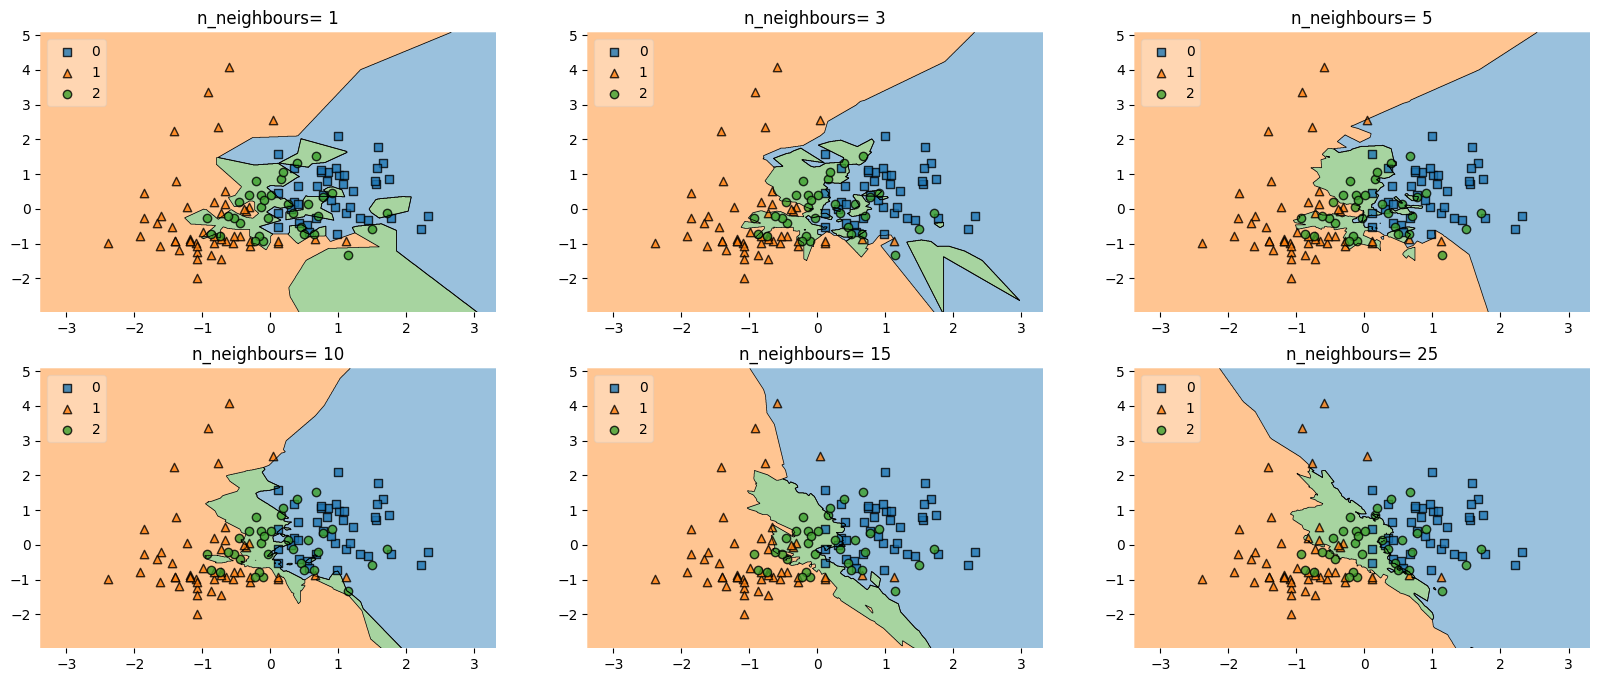

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(20,8))

labels = [f'n_neighbours= {i}' for i in neighbours_list]
for clf, lab, grd in zip(knns,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_scale[:, [0, 1]], y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

__Ответ__: Из задания 1.3 следует, что оптимальным числом соседей является 10 или 25 для обучения классификатора. Это связано с показателями доли правильных ответов: 10 соседей train 0.75 test 0.65, 25 соседей train 0.69 test 0.69. Явное переобучение можно наблюдать для 1 соседа, так как доля правильных ответов на трейне составляет 1, а для теста 0.56. Значит модель имеет низкие обобщающие способности, она переобучилась на трейне и плохо предсказывает значение для теста. Обращаясь к визуализации можно заметить, что для небольшого числа соседей (1 - 5) зеленые точки явно выделяют небольшими областями зеленого цвета внутри областей других классов, это является признаком переобучения. Лучшим результатом является график при 25 соседях, так как каждый класс представляет из себя цельную область без включенных в неё небольших областей других классов.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

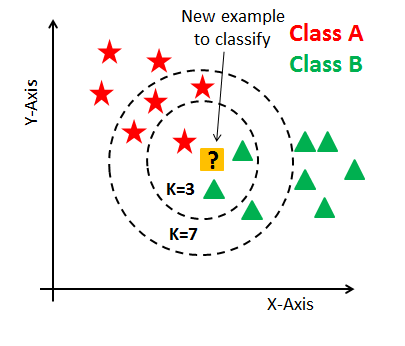

In [33]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        # Запоминаем обучающую выборку
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        # Создаем список предиктов меток класса
        predicts = []
        for x in X:
            # Считаем расстояния от каждого объекта вектора тестовой выборки
            # до каждого объекта вектора обучающей выборки
            dists = [self.count_distance(x, x_train) for x_train in self.X_train]
            # Получаем индексы ближайших k соседей
            nearest_neighbors_ind = np.argsort(dists)[:self.k]
            # Возвращаем метки класса для этих соседей
            k_labels = [self.y_train[ind] for ind in nearest_neighbors_ind]
            label_counter = Counter(k_labels)
            # Находим самую частую метку класса среди k ближайших соседей
            predicts.append(label_counter.most_common(1)[0][0])

        return np.array(predicts)

    def count_distance(self, x, y):
        return np.sqrt(np.sum((x - y) ** 2))

In [34]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [35]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [7]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [8]:
# Удаление бессмысленного столбца Unnamed: 0
data = data.drop(columns=data.columns[0], axis=1)
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

__Ответ__: в датасете есть бессмысленный столбец индексации Unnamed: 0, который не несет дополнительной информации. Пропущенных значений нет.

**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [9]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [10]:
data.select_dtypes(include=['float64', 'int64']).corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


__Ответ__: наиболее сильную корреляцию с целевой переменной наблюдается у признаков x, y, z (0.88, 0.87 и 0.87 соответственно) и carat (0.92), где x, y, z - длина, ширина и глубина бриллианта.

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [11]:
data = pd.get_dummies(data)
data.head(5)

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [20]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['price'])
y = data['price']

np.random.seed(42)

# Бинаризация таргета
bins = np.linspace(data['price'].min(), data['price'].max() + 1, 300)
y_binned = np.digitize(y, bins)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y_binned)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [21]:
from sklearn.preprocessing import StandardScaler

num_features = X.select_dtypes(include=['float64']).columns # Берем только вещественные признаки

scaler = StandardScaler()

X_train_scale = X_train.copy()
X_train_scale[num_features] = scaler.fit_transform(X_train_scale[num_features])

X_test_scale = X_test.copy()
X_test_scale[num_features] = scaler.transform(X_test_scale[num_features])

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
model = LinearRegression()
model.fit(X_train_scale, y_train)

mse_train = mean_squared_error(y_train, model.predict(X_train_scale))
mse_test = mean_squared_error(y_test, model.predict(X_test_scale))

print(f'MSE on train: {round(mse_train,2)}')
print(f'MSE on test: {round(mse_test,2)}')

MSE on train: 1290054.14
MSE on test: 1246585.31


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [24]:
def show_weights(model):
    coefs = model.coef_
    features = X_train.columns
    for feature, coef in zip(features, coefs):
        print(f"{feature}: {round(coef, 2)}")
show_weights(model)

carat: 5367.36
depth: -100.89
table: -71.36
x: -1228.04
y: 66.59
z: -28.87
cut_Fair: -545.18
cut_Good: -9.16
cut_Ideal: 236.11
cut_Premium: 178.67
cut_Very Good: 139.57
color_D: 833.6
color_E: 618.92
color_F: 567.33
color_G: 343.22
color_H: -147.16
color_I: -649.03
color_J: -1566.87
clarity_I1: -3820.92
clarity_IF: 1535.11
clarity_SI1: -154.96
clarity_SI2: -1106.9
clarity_VS1: 762.6
clarity_VS2: 459.34
clarity_VVS1: 1196.86
clarity_VVS2: 1128.87


__Ответ__: среди вещественных переменных, оценки коэффициентов для которых по модулю на порядок выше оценок прочих вещественных переменных, выделяются carat и x признаки.

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [25]:
from sklearn.linear_model import Lasso, Ridge

lasso_model = Lasso(alpha=10)
ridge_model = Ridge(alpha=10)

lasso_model.fit(X_train_scale, y_train)
ridge_model.fit(X_train_scale, y_train)

print(f'Веса Lasso-регрессии: ')
show_weights(lasso_model)

Веса Lasso-регрессии: 
carat: 4877.95
depth: -111.18
table: -88.05
x: -747.34
y: -0.0
z: -26.95
cut_Fair: -394.04
cut_Good: -35.74
cut_Ideal: 77.53
cut_Premium: 0.0
cut_Very Good: 0.0
color_D: 342.68
color_E: 168.16
color_F: 127.31
color_G: 0.0
color_H: -430.68
color_I: -868.44
color_J: -1676.0
clarity_I1: -3583.68
clarity_IF: 688.49
clarity_SI1: -641.38
clarity_SI2: -1530.65
clarity_VS1: 151.28
clarity_VS2: -14.89
clarity_VVS1: 521.17
clarity_VVS2: 498.71


In [26]:
print(f'Веса Ridge-регрессии: ')
show_weights(ridge_model)

Веса Ridge-регрессии: 
carat: 5326.28
depth: -99.36
table: -71.55
x: -1174.75
y: 54.3
z: -32.47
cut_Fair: -548.32
cut_Good: -8.98
cut_Ideal: 237.39
cut_Premium: 178.54
cut_Very Good: 141.38
color_D: 828.83
color_E: 615.25
color_F: 563.69
color_G: 341.65
color_H: -147.62
color_I: -645.99
color_J: -1555.81
clarity_I1: -3748.93
clarity_IF: 1515.68
clarity_SI1: -163.12
clarity_SI2: -1110.68
clarity_VS1: 752.65
clarity_VS2: 450.88
clarity_VVS1: 1185.26
clarity_VVS2: 1118.25


__Ответ__: применив модули Lasso и Ridge можно заметить, что веса по модулю уменьшились. Большего всего это заметно при Lasso - регрессии, некоторые веса обнулились, тем самым отобрались наиболее информативные признаки, остальные же веса уменьшились, по сравнению с алгоритмом, работающим без регуляризации. В начальной реализации проблема мультиколлинеарности сильно проявлялась, так как порядки некоторых весов значительно превосходили остальные. Это связано с высокой корреляцией между признаками.

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.567e+07, tolerance: 6.004e+07
  model = cd_fast.enet_coordinate_descent(


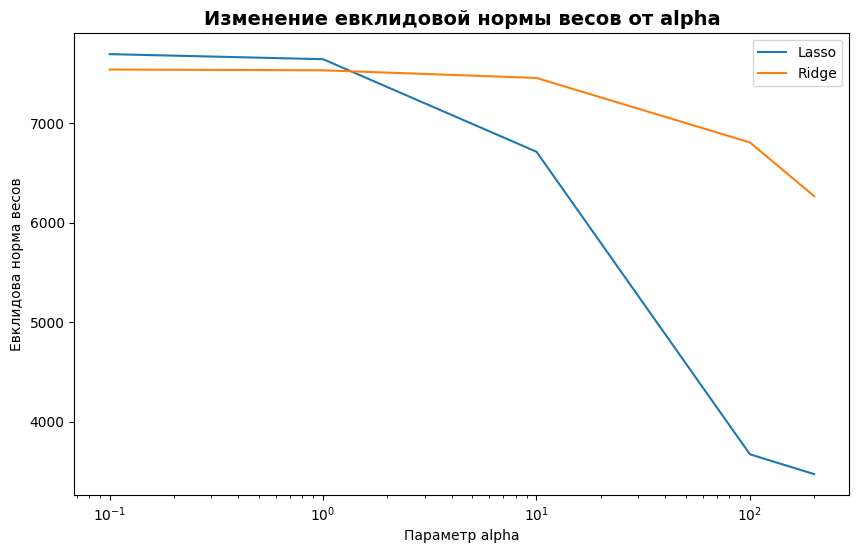

In [27]:
def get_norm_weights(X, y, alphas, model_type):
    norms_weights = []
    for alpha_val in alphas:
        if model_type == 'Lasso':
            model = Lasso(alpha=alpha_val)
        elif model_type == 'Ridge':
            model = Ridge(alpha=alpha_val)
        model.fit(X, y)
        norms_weights.append(np.linalg.norm(model.coef_))
    return norms_weights


alphas = [0.1, 1, 10, 100, 200]

plt.figure(figsize=(10, 6))
plt.title('Изменение евклидовой нормы весов от alpha', fontsize=14, weight="heavy")
plt.plot(alphas, get_norm_weights(X_train_scale, y_train, alphas, 'Lasso'), label='Lasso')
plt.plot(alphas, get_norm_weights(X_train_scale, y_train, alphas, 'Ridge'), label='Ridge')
plt.xscale('log')
plt.xlabel('Параметр alpha')
plt.ylabel('Евклидова норма весов')
plt.legend()

plt.show()

__Ответ__: агрессивнее уменьшает веса метод L1 регуляризации, то есть Lasso модель. Она может обнулить некоторые веса, то есть использоваться для отбора признаков. Lasso модель использует L1 регуляразатор, который минимизирует сумму модулей весов, в отличие от Ridge модели, которая использует L2 регуляризатор, который минимизирует сумму квадратов модулей весов, то есть Ridge модель уменьшает веса плавнее, чем Lasso, которая может эти веса обнулить в следствии более агрессивного подхода.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [28]:
from sklearn.linear_model import LassoCV

alphas = [0.1, 1, 10, 100, 200]

model = LassoCV(alphas=alphas, cv=5)
model.fit(X_train_scale, y_train)

mse_matrix = model.mse_path_
mean_mse = mse_matrix.mean(axis=1)

print("alpha", "MSE")
table = zip(model.alphas_, mean_mse)
for row in table:
    print("{:>5} {:>5}".format(*row))

best_alpha = model.alpha_
print(f'Параметр alpha, дающий наибольшее качество: {best_alpha}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 904281227.0659714, tolerance: 47819454.29337884
  model = cd_fast.enet_coordinate_descent_gram(


alpha MSE
200.0 2463135.1841379753
100.0 2253105.4743033904
 10.0 1330015.911484021
  1.0 1293503.5292250947
  0.1 1293868.596333692
Параметр alpha, дающий наибольшее качество: 1.0


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [29]:
model = Lasso(alpha=best_alpha)
model.fit(X_train_scale, y_train)
show_weights(model)

carat: 5320.27
depth: -102.74
table: -73.13
x: -1124.73
y: 0.0
z: -25.9
cut_Fair: -661.04
cut_Good: -139.56
cut_Ideal: 92.14
cut_Premium: 29.12
cut_Very Good: 0.0
color_D: 476.22
color_E: 265.62
color_F: 215.01
color_G: 0.0
color_H: -484.14
color_I: -979.52
color_J: -1886.31
clarity_I1: -4288.48
clarity_IF: 960.96
clarity_SI1: -693.52
clarity_SI2: -1639.34
clarity_VS1: 211.93
clarity_VS2: -77.96
clarity_VVS1: 639.42
clarity_VVS2: 575.97


__Ответ__: Менее информативными вещественными признаками оказались все, за исключением явно выделяющихся весов признаков Carat и X, которые характеризуют карат и размер бриллианта. Масса и размер бриллианта являются ключевыми признаками при формировании его цены. Среди категориальных признаков выделяются cut_Fair - тусклая огранка бриллианта, которая негативно сказывается на его цене, цвет (color_I, color_J) и качество бриллианта (clarity_I1 - самое низкое качество, clarity_IF - самое лучшее качество, clarity_SI2 - одно из наихудших качеств). Отрицательный вес у признака X с большим по модулю значением пытается скомпенсировать влияние признака Carat, так как они коллинеарны.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [32]:
print(f'MSE on test Lasso-reg {mean_squared_error(y_test, model.predict(X_test_scale))}')

MSE on test Lasso-reg 1245513.32611282


__Ответ__: Ошибка обычной линейной регрессии из задачи 3.6 : 1246585. Lasso-регрессия оказалась незначительно лучше, чем обычная линейная регрессия. Для предсказаний лучше использоваться Lasso-регрессию с параметром регуляризации alpha=1, чтобы снизить веса, выделить значимые признаки для простоты интерпритации результатов и упрощения модели, избавиться от мультиколлинеарности.